In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
homedata = pd.read_csv('homedata.csv')
homedata.shape

(21613, 21)

In [3]:
homedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
homedata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
X =  homedata.iloc[:,[3,4,5,8]].values
Y = homedata['price'].values.reshape(-1,1)

In [6]:
X0 = np.ones(len(X))
X = np.array([X0,X[:,0],X[:,1],X[:,2],X[:,3]])
B = np.zeros(5)

In [7]:
X.shape

(5, 21613)

In [8]:
X = X.T

In [9]:
X.shape

(21613, 5)

In [10]:
#Feature Scaling

In [11]:
sc = StandardScaler()
n = len(X[:,1])

In [12]:
X = sc.fit_transform(X)
Y = sc.fit_transform(Y)

C:\Users\Akhilesh Kr. Pandey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Akhilesh Kr. Pandey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 10)

In [14]:
B

array([0., 0., 0., 0., 0.])

In [15]:
def cost_function(X,Y,B):
    return np.sum((X.dot(B)-Y)**2)/(2*n)

In [16]:
def gradient_descent(X,Y,B,alpha,epochs):
    cost_history = [0]*epochs
    for i in range(epochs):
        Y_P = X.dot(B)
        loss = Y_P - Y
        gd = (1/n)*(X.T.dot(loss))
        B = B - (alpha*gd)
        cost_history[i] = cost_function(X,Y,B)
    return cost_history,B
        

In [17]:
alpha = 0.001
epochs = 8000
cost,newB = gradient_descent(X,Y.flatten(),B,alpha,epochs)

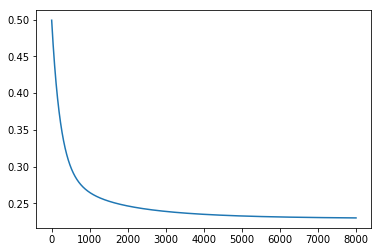

In [18]:
temp_x = [i for i in range(len(cost))]
plt.plot(temp_x,cost)

In [19]:
cost[0]

0.49906632694034153

In [20]:
cost[-1]

0.23010640284755318

In [21]:
newB

array([ 0.        , -0.11423837,  0.07026181,  0.67984695,  0.19174395])

In [52]:
Y_P = X.dot(newB)

In [53]:
Y_P[0:10]

array([-0.739003  ,  0.40396438, -0.91966798, -0.10198707, -0.2776533 ,
        2.59607603, -0.22893708, -0.78221534, -0.29486163, -0.07658788])

In [54]:
Y_P = sc.inverse_transform(Y_P)

In [55]:
Y_P

array([268786.31778974, 688391.02048807, 202460.82654696, ...,
       262026.17936084, 433162.5403739 , 262026.17936084])

In [56]:
Y = sc.inverse_transform(Y)

In [57]:
Y

array([[2.99070242e+16],
       [7.25097626e+16],
       [2.42599038e+16],
       ...,
       [5.41938197e+16],
       [5.39106550e+16],
       [4.38024444e+16]])

In [58]:
Y_P.shape

(21613,)

In [59]:
Y.shape

(21613, 1)

In [60]:
Y_P = Y_P.reshape(-1,1) 

In [61]:
Y_P

array([[268786.31778974],
       [688391.02048807],
       [202460.82654696],
       ...,
       [262026.17936084],
       [433162.5403739 ],
       [262026.17936084]])

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
mse = mean_squared_error(Y,Y_P)

In [64]:
print(mse)

7.746713807510842e+33


In [65]:
rmse = np.sqrt(mse)

In [66]:
print(rmse)

8.801541801020342e+16
